* Budhdeo Kumar
* Information Technology Department
* Birla Institute of Technology , Patna
* budhdeo.abc@gmail.com
* JAN 31 , 2019

In [1]:
# Import environment tools
import re
import itertools
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import keras

# Import plotly tools
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

# Import keras tools
from keras import regularizers
from keras.callbacks import History 
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Import other tools
from __future__ import print_function
from pandas import read_excel
from IPython.display import Image
from collections import Counter
from itertools import cycle
from scipy import stats, integrate, interp
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

Using TensorFlow backend.


heart-disease-with-76-attributes
heartdiseaseensembleclassifier



In [2]:
import sklearn
# Gradient Boosters
import xgboost as xgb # Accuracy
import lightgbm as lgb # Speed

from sklearn import decomposition, preprocessing, svm
# Dimensionality Reduction
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
# Ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
# Guassian
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
# Regression
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
# Bayesian
from sklearn.naive_bayes import GaussianNB
# Instance Based
from sklearn.neighbors import KNeighborsClassifier
# Nueral Network
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import relevant machine learning analyis tools
from sklearn import metrics
#from sklearn.cross_validation import KFold, train_test_split
# Imputation
from sklearn.impute import SimpleImputer 
from sklearn.metrics import mean_absolute_error,roc_curve,accuracy_score,auc,roc_auc_score,confusion_matrix,precision_score,recall_score,f1_score, classification_report
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.model_selection import BaseCrossValidator, GridSearchCV, train_test_split,cross_val_score,cross_validate,cross_val_predict, KFold, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline
# Standardization
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize


# Initial tool settings
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
plt.style.use('fivethirtyeight')
sns.set(style='white', context='notebook', palette='deep')
py.init_notebook_mode(connected=True)

history = History()
random_state = 43

names = ["k-Nearest Neighbors",         
         "Support Vector Machine",
         "Linear SVM",
         "RBF SVM",
         "Gaussian Process",
         "Decision Tree",
         "Extra Trees",
         "Random Forest",
         "Extra Forest",
         "AdaBoost",
         "Gaussian Naive Bayes",
         "LDA",
         "QDA",
         "Logistic Regression",
         "SGD Classifier",
         "Multilayer Perceptron",
         "Voting Classifier"
        ]

algorithms = [ KNeighborsClassifier(n_neighbors=3),
               SVC(random_state=random_state),
               SVC(kernel="linear",random_state=random_state),
               SVC(kernel="rbf",random_state=random_state),
               GaussianProcessClassifier(),
               DecisionTreeClassifier(random_state=random_state),
               ExtraTreesClassifier(random_state=random_state),
               RandomForestClassifier(random_state=random_state),
               GradientBoostingClassifier(random_state=random_state),
               AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),n_estimators=10,learning_rate=0.1,random_state=random_state),
               GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression(random_state=random_state),
               SGDClassifier(),               
               MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
               VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard')
              ]
#algorithms.append(SVC(random_state=random_state))

classifiers = {  "k-Nearest Neighbors" : KNeighborsClassifier(n_neighbors=3),
                 "Support Vector Machine" :  SVC(random_state=random_state),
                 "Linear SVM" :  SVC(kernel="linear",random_state=random_state),
                 "RBF SVM" :  SVC(kernel="rbf",random_state=random_state),
                 "Gaussian Process" : GaussianProcessClassifier(),
                 "Decision Tree" : DecisionTreeClassifier(random_state=random_state),
                 "Extra Trees" : ExtraTreesClassifier(random_state=random_state),
                 "Random Forest" : RandomForestClassifier(random_state=random_state),
                 "Extra Forest" : GradientBoostingClassifier(random_state=random_state),
                 "AdaBoost" : AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),n_estimators=10,random_state=random_state,learning_rate=0.1),
                 "Gaussian Naive Bayes" : GaussianNB(),
                 "LDA" : LinearDiscriminantAnalysis(),
                 "QDA" :  QuadraticDiscriminantAnalysis(),
                 "Logistic Regression" : LogisticRegression(random_state=random_state),
                 "SGD Classifier" : SGDClassifier(),
                 "Multilayer Perceptron" :  MLPClassifier(hidden_layer_sizes=(100,),momentum=0.9,solver='sgd',random_state=random_state),
                 "Voting Classifier" : VotingClassifier(estimators=[('log', LogisticRegression()), ('SVM',SVC(C=1000)), ('MLP', MLPClassifier(hidden_layer_sizes=(100,)))], voting='hard')
              }
print("Done!")

Done!


**Import Data**

In [3]:
df=pd.read_csv("../input/heart-disease-with-76-attributes/cleveland_data.csv",header=None)

**Data Cleaning**
* Milestones in data cleaning:
1. 1.  Information of each person is seperated in 3 or 4 or 5 rows.
1. 2.  Missing values
1. 3.  Untidy Dataset

**Conversion of datatype of every data for data cleaning**
* Change each data to string dtype 

In [4]:
rw=[]
for row_index,row in df.iterrows():
    x=str(row)
    rw.append(list(map(str,x.split())))
row1=list(df[0])

A Python function to parse and extract the data of 76 columns for each row and select only those rows which have every data for 76 columns.

In [5]:
row1=list(df[0])
row1[0]='1 0 63 1 9 9 9'
row2=[]
s=''
for i in row1:
    if(i[-1]=='e'):
        s=s+" "+i
        row2.append(s)
        s=''
    else:
        s=s+" "+i
for i in range(len(row2)):
    row2[i]=list(row2[i].split())
fault=[]
for i in range(len(row2)):
    if(len(row2[i]) != 76):
        fault.append(i)
row3=row2[:282]
data = pd.DataFrame(row3)

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,9,9,9,-9,1,145,1,233,-9,50,20,1,-9,1,2,2,3,81,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,-9,172,0,-9,-9,-9,-9,-9,-9,6,-9,-9,-9,2,16,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,1,286,-9,40,40,0,-9,1,2,3,5,81,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,-9,185,3,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,5,81,2,1,2,2,-9,2,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,1,229,-9,20,35,0,-9,1,2,2,19,81,0,1,0,0,0,1,8.5,6,10,129,78,140,80,120,80,1,0,2.6,2,-9,150,2,-9,-9,-9,-9,-9,-9,7,-9,-9,-9,2,20,81,1,1,1,1,-9,1,-9,1,-9,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,0,250,-9,0,0,0,-9,1,0,2,13,81,0,1,0,0,0,1,13,13,17,187,84,195,68,130,78,0,0,3.5,3,-9,167,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,4,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,1,204,-9,0,0,0,-9,1,2,2,7,81,0,0,0,0,0,1,7,-9,9,172,71,160,74,130,86,0,0,1.4,1,-9,40,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,18,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
5,7,0,56,1,-9,-9,-9,-9,2,120,1,236,-9,20,20,0,-9,1,0,3,9,81,1,0,0,0,0,1,11.3,-9,16,178,73,165,70,120,75,0,0,0.8,1,-9,127,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,3,10,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
6,8,0,62,0,-9,-9,-9,-9,4,140,0,268,-9,0,0,0,-9,1,2,1,28,81,0,0,0,0,0,1,6,6,7,160,83,180,84,140,100,0,0,3.6,3,-9,122,2,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,2,81,3,1,2,1,-9,1,-9,2,-9,2,1,1,1,1,7,1,-9,-9,name
7,9,0,57,0,-9,-9,-9,-9,4,120,1,354,-9,0,0,0,-9,1,0,7,20,81,0,0,0,0,0,1,9,6,10,163,84,165,80,120,80,1,0,0.6,1,-9,122,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,7,21,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
8,10,0,63,1,-9,-9,-9,-9,4,130,1,254,-9,0,0,0,-9,0,2,7,2,81,0,1,1,0,0,1,8,8,9,147,75,120,70,130,105,0,0,1.4,2,-9,75,1,-9,-9,-9,-9,-9,-9,7,-9,-9,-9,7,3,81,2,1,2,1,-9,1,-9,1,-9,2,1,1,1,6,7,2,-9,-9,name
9,11,0,53,1,-9,-9,-9,-9,4,140,0,203,-9,20,25,1,-9,1,2,7,3,81,0,1,0,0,1,1,5.5,3,7,155,86,185,120,140,100,1,0,3.1,3,-9,68,0,-9,-9,-9,-9,-9,-9,7,-9,-9,-9,7,6,81,1,1,1,1,-9,1,-9,1,-9,2,1,1,1,1,1,1,-9,-9,name


**76 features in dataset**
* Complete attribute documentation: 
* 1 id: patient identification number 
* 2 ccf: social security number (I replaced this with a dummy value of 0) 
* 3 age: age in years 
* 4 sex: sex (1 = male; 0 = female) 
* 5 painloc: chest pain location (1 = substernal; 0 = otherwise) 
* 6 painexer (1 = provoked by exertion; 0 = otherwise) 
* 7 relrest (1 = relieved after rest; 0 = otherwise) 
* 8 pncaden (sum of 5, 6, and 7) 
* 9 cp: chest pain type 
* -- Value 1: typical angina 
* -- Value 2: atypical angina 
* -- Value 3: non-anginal pain 
* -- Value 4: asymptomatic 
* 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* 11 htn 
* 12 chol: serum cholestoral in mg/dl 
* 13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker) 
* 14 cigs (cigarettes per day) 
* 15 years (number of years as a smoker) 
* 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* 17 dm (1 = history of diabetes; 0 = no such history) 
* 18 famhist: family history of coronary artery disease (1 = yes; 0 = no) 
* 19 restecg: resting electrocardiographic results 
* -- Value 0: normal 
* -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
* -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
* 20 ekgmo (month of exercise ECG reading) 
* 21 ekgday(day of exercise ECG reading) 
* 22 ekgyr (year of exercise ECG reading) 
* 23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no) 
* 24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no) 
* 25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no) 
* 26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no) 
* 27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no) 
* 28 proto: exercise protocol 
* 1 = Bruce 
* 2 = Kottus 
* 3 = McHenry 
* 4 = fast Balke 
* 5 = Balke 
* 6 = Noughton 
* 7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!) 
* 8 = bike 125 kpa min/min 
* 9 = bike 100 kpa min/min 
* 10 = bike 75 kpa min/min 
* 11 = bike 50 kpa min/min 
* 12 = arm ergometer 
* 29 thaldur: duration of exercise test in minutes 
* 30 thaltime: time when ST measure depression was noted 
* 31 met: mets achieved 
* 32 thalach: maximum heart rate achieved 
* 33 thalrest: resting heart rate 
* 34 tpeakbps: peak exercise blood pressure (first of 2 parts) 
* 35 tpeakbpd: peak exercise blood pressure (second of 2 parts) 
* 36 dummy 
* 37 trestbpd: resting blood pressure 
* 38 exang: exercise induced angina (1 = yes; 0 = no) 
* 39 xhypo: (1 = yes; 0 = no) 
* 40 oldpeak = ST depression induced by exercise relative to rest 
* 41 slope: the slope of the peak exercise ST segment 
* -- Value 1: upsloping 
* -- Value 2: flat 
* -- Value 3: downsloping 
* 42 rldv5: height at rest 
* 43 rldv5e: height at peak exercise 
* 44 ca: number of major vessels (0-3) colored by flourosopy 
* 45 restckm: irrelevant 
* 46 exerckm: irrelevant 
* 47 restef: rest raidonuclid (sp?) ejection fraction 
* 48 restwm: rest wall (sp?) motion abnormality 
* 0 = none 
* 1 = mild or moderate 
* 2 = moderate or severe 
* 3 = akinesis or dyskmem (sp?) 
* 49 exeref: exercise radinalid (sp?) ejection fraction 
* 50 exerwm: exercise wall (sp?) motion 
* 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* 52 thalsev: not used 
* 53 thalpul: not used 
* 54 earlobe: not used 
* 55 cmo: month of cardiac cath (sp?) (perhaps "call") 
* 56 cday: day of cardiac cath (sp?) 
* 57 cyr: year of cardiac cath (sp?) 
* 58 num: diagnosis of heart disease (angiographic disease status) 
* -- Value 0: < 50% diameter narrowing 
* -- Value 1: > 50% diameter narrowing 
* (in any major vessel: attributes 59 through 68 are vessels) 
* 59 lmt 
* 60 ladprox 
* 61 laddist 
* 62 diag 
* 63 cxmain 
* 64 ramus 
* 65 om1 
* 66 om2 
* 67 rcaprox 
* 68 rcadist 
* 69 lvx1: not used 
* 70 lvx2: not used 
* 71 lvx3: not used 
* 72 lvx4: not used 
* 73 lvf: not used 
* 74 cathef: not used 
* 75 junk: not used 
* 76 name: last name of patient (I replaced this with the dummy string "name")



In [7]:
features=['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 'trestbps', 'htn', 'chol','smoke', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'pred_attribute', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk', 'name']

Setting up dataset with features as column name.

In [8]:
data.columns=features

In [9]:
data.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,pred_attribute,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1,9,9,9,-9,1,145,1,233,-9,50,20,1,-9,1,2,2,3,81,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,-9,172,0,-9,-9,-9,-9,-9,-9,6,-9,-9,-9,2,16,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,1,286,-9,40,40,0,-9,1,2,3,5,81,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,-9,185,3,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,5,81,2,1,2,2,-9,2,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,1,229,-9,20,35,0,-9,1,2,2,19,81,0,1,0,0,0,1,8.5,6,10,129,78,140,80,120,80,1,0,2.6,2,-9,150,2,-9,-9,-9,-9,-9,-9,7,-9,-9,-9,2,20,81,1,1,1,1,-9,1,-9,1,-9,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,0,250,-9,0,0,0,-9,1,0,2,13,81,0,1,0,0,0,1,13,13,17,187,84,195,68,130,78,0,0,3.5,3,-9,167,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,4,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,1,204,-9,0,0,0,-9,1,2,2,7,81,0,0,0,0,0,1,7,-9,9,172,71,160,74,130,86,0,0,1.4,1,-9,40,0,-9,-9,-9,-9,-9,-9,3,-9,-9,-9,2,18,81,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9,name


**Data Visualization**

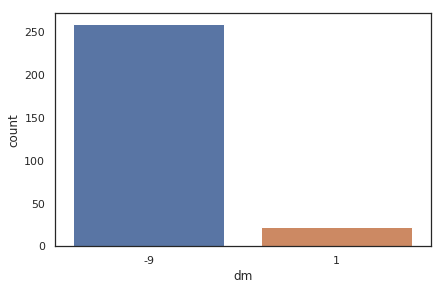

In [10]:
sns.countplot(x=data['dm'])
plt.show()

This plot shows that there is missing data in history of diabities in their family "dm" column which is non-medical attribute.

In [11]:
r=list(data['cigs'])
l=list(data['smoke'])
for i in range(len(r)):
    if(int(r[i])>0):
        l[i]=1
    else:
        l[i]=0

These attributes are used for further model.

In [12]:
attributes_used=['age','sex','cp','trestbps','fbs','famhist','thalrest','trestbpd','exang','pred_attribute']

In [13]:
m=[]
for i in range(len(features)):
    if(features[i] in attributes_used):
        pass
    else:
        m.append(i)

Drop the unused columns.

In [14]:
data.drop(data.columns[m], axis=1, inplace=True)

In [15]:
data.head()

,age,sex,cp,trestbps,fbs,famhist,thalrest,trestbpd,exang,pred_attribute
0,63,1,1,145,1,1,60,85,0,0
1,67,1,4,160,0,1,64,90,1,2
2,67,1,4,120,0,1,78,80,1,1
3,37,1,3,130,0,1,84,78,0,0
4,41,0,2,130,0,1,71,86,0,0


In [16]:
data = data.convert_objects(convert_numeric=True)

In [17]:
data.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
fbs               int64
famhist           int64
thalrest          int64
trestbpd          int64
exang             int64
pred_attribute    int64
dtype: object

In [18]:
data["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

In [19]:
data.sort_values('pred_attribute').head()

,age,sex,cp,trestbps,fbs,famhist,thalrest,trestbpd,exang,pred_attribute
0,63,1,1,145,1,1,60,85,0,0
152,67,0,3,115,0,0,80,82,0,0
159,68,1,3,118,0,0,64,70,0,0
160,46,1,2,101,1,0,74,70,0,0
162,54,0,3,110,0,1,63,64,0,0


In [20]:
data.head()

,age,sex,cp,trestbps,fbs,famhist,thalrest,trestbpd,exang,pred_attribute
0,63,1,1,145,1,1,60,85,0,0
1,67,1,4,160,0,1,64,90,1,1
2,67,1,4,120,0,1,78,80,1,1
3,37,1,3,130,0,1,84,78,0,0
4,41,0,2,130,0,1,71,86,0,0


Distribution of data in each column of attributes used.

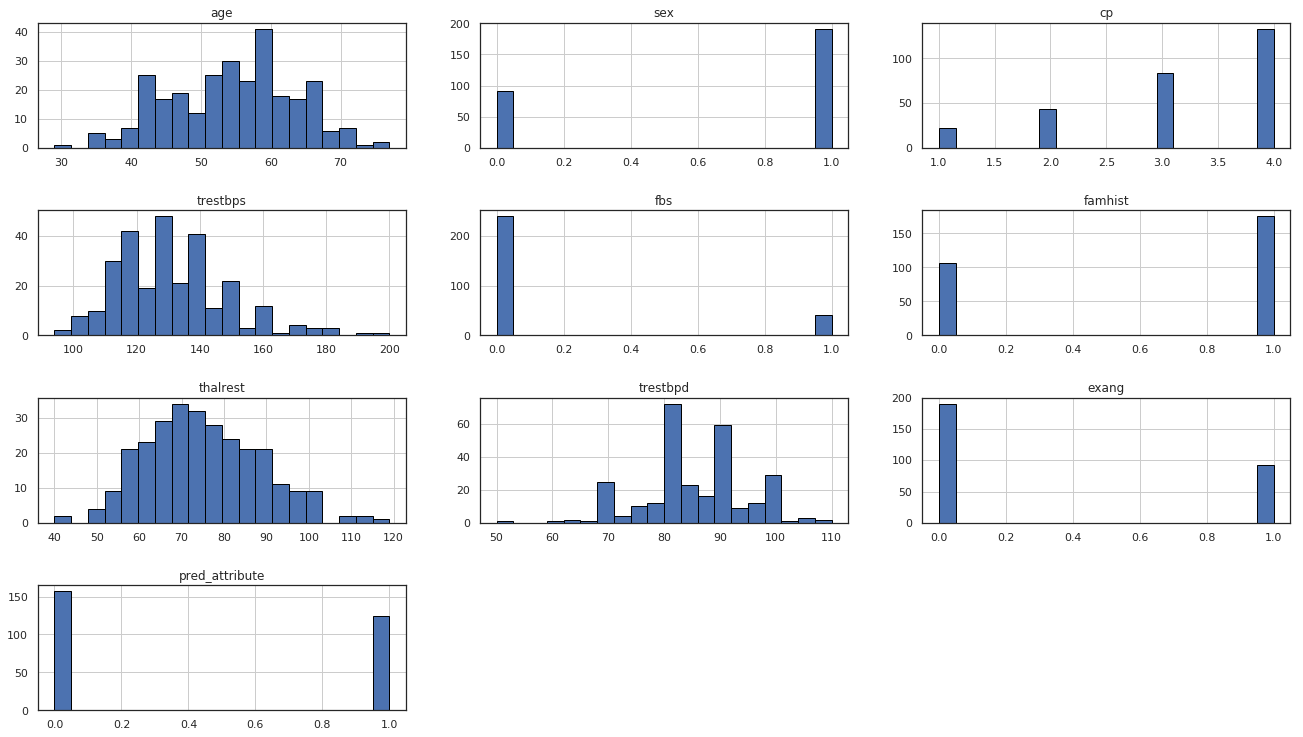

In [21]:
plt.subplots(figsize=(20,15))
length=len(attributes_used)
for i,j in itertools.zip_longest(attributes_used,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [22]:
cont_attributes=['age','trestbps','thalrest','trestbpd','pred_attribute']
disc_attributes=['cp','fbs','famhist','exang','pred_attribute']

Relation between attributes and prediction attributes.

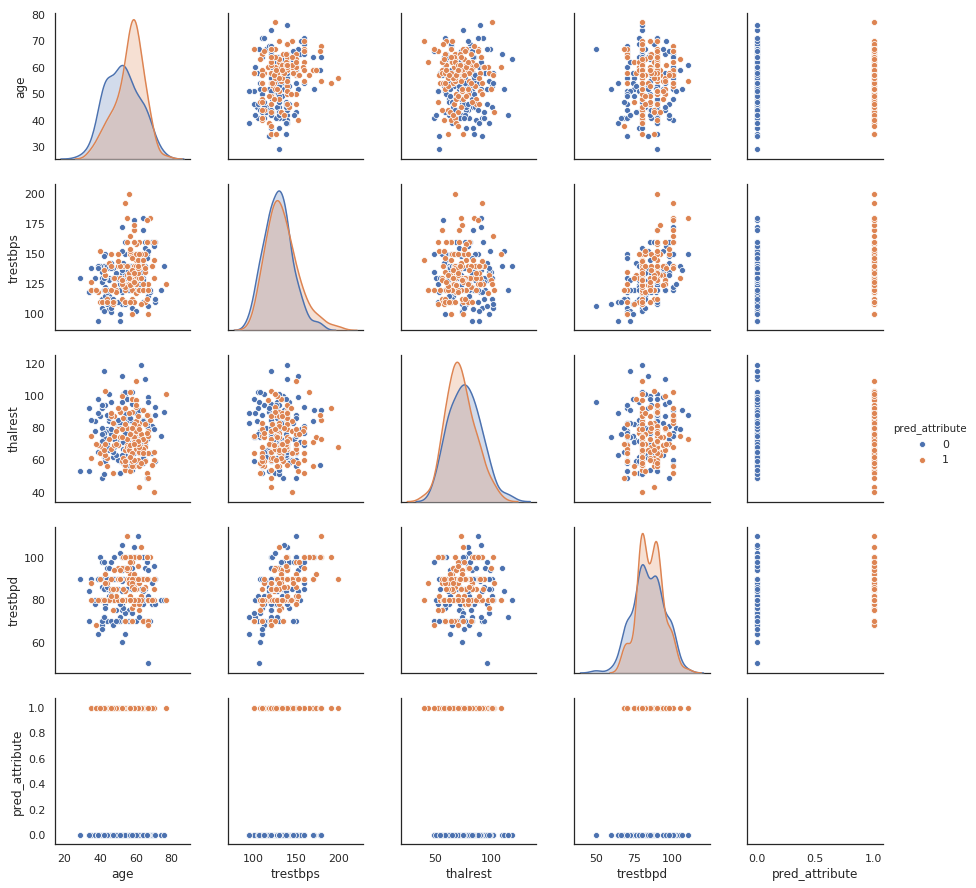

In [23]:
sns.pairplot(data=data[cont_attributes],hue='pred_attribute',diag_kind='kde')
#plt.gcf().set_size_inches(20,15)
plt.show()

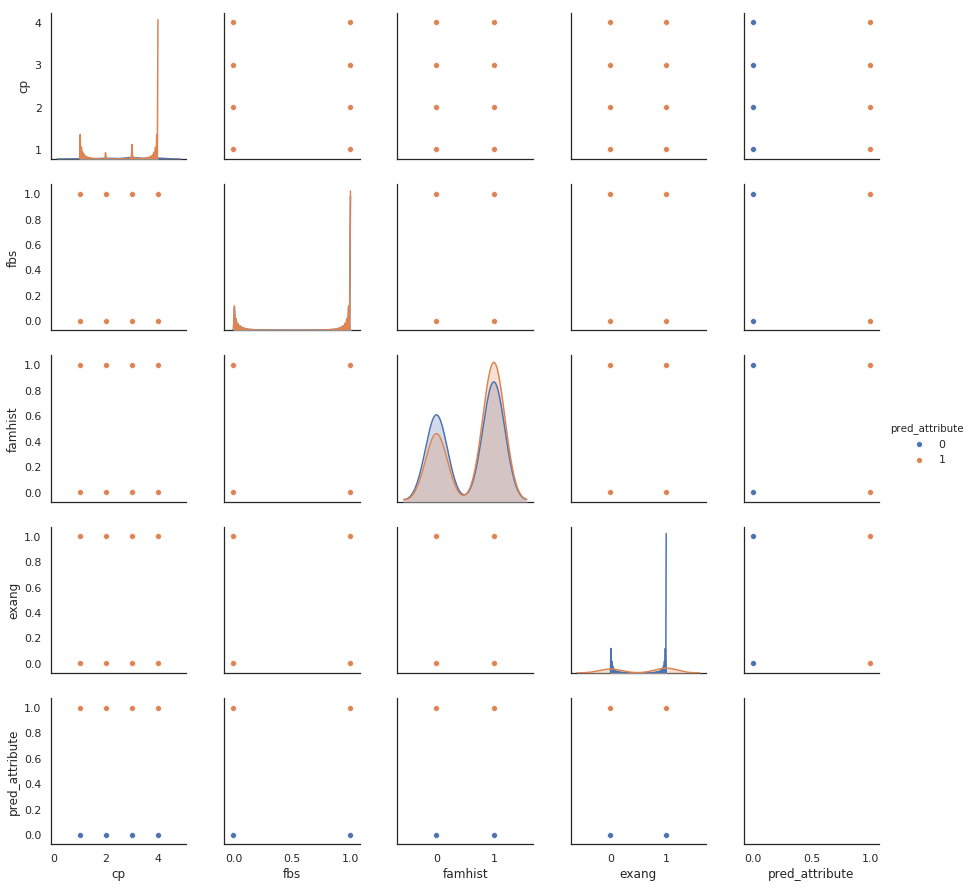

In [24]:
sns.pairplot(data=data[disc_attributes],hue='pred_attribute',diag_kind='kde')
#plt.gcf().set_size_inches(20,15)
plt.show()

Checking of outliers.

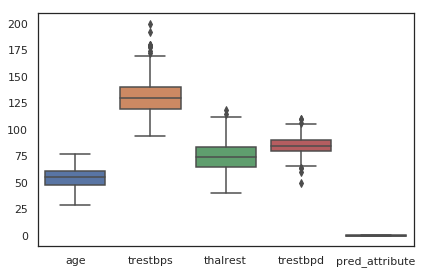

In [25]:
sns.boxplot(data=data[cont_attributes])
#plt.gcf().set_size_inches(20,15)
plt.show()

In [26]:
data[cont_attributes].describe()

,age,trestbps,thalrest,trestbpd,pred_attribute
count,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,131.563830,75.117021,84.946809,0.443262
std,9.053083,17.757496,13.795809,9.477864,0.497654
min,29.000000,94.000000,40.000000,50.000000,0.000000
25%,48.000000,120.000000,65.000000,80.000000,0.000000
50%,55.000000,130.000000,74.000000,85.000000,0.000000
75%,61.000000,140.000000,84.000000,90.000000,1.000000
max,77.000000,200.000000,119.000000,110.000000,1.000000


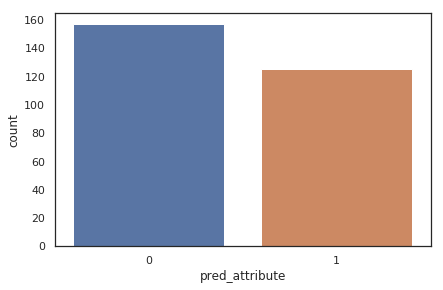

In [27]:
sns.countplot(x='pred_attribute',data=data)
plt.show()

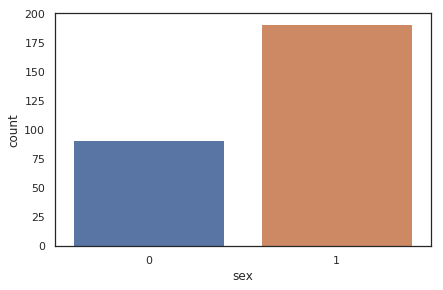

In [28]:
sns.countplot(x='sex',data=data)
plt.show()

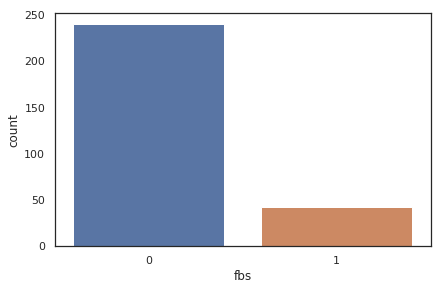

In [29]:
sns.countplot(x='fbs',data=data)
plt.show()

In [30]:
#sns.countplot(x='smoke',data=data)
#plt.show()

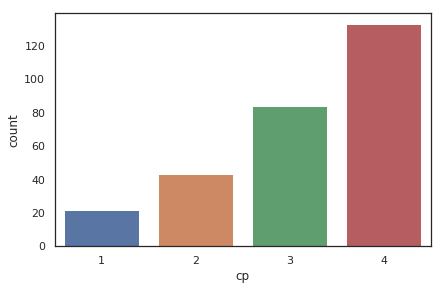

In [31]:
sns.countplot(x='cp',data=data)
plt.show()

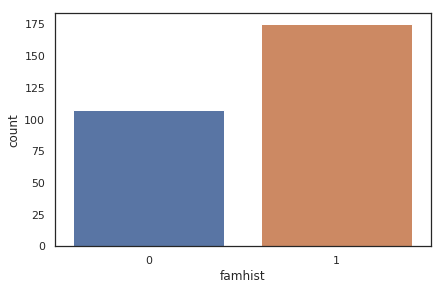

In [32]:
sns.countplot(x='famhist',data=data)
plt.show()

Check for null value.

In [33]:
data.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
fbs               0
famhist           0
thalrest          0
trestbpd          0
exang             0
pred_attribute    0
dtype: int64

Setting up for Machine learnig model.

In [34]:
#dataset = dataset.convert_objects(convert_numeric=True)

# Load data
X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values # = dataset.iloc[:, 12].values

#dataset.dropna(inplace=True, axis=0, how="any")
#X=dataset.loc[:, "age":"thal" ]
#y=dataset["pred_attribute"]
#np_X = np_dataset[:, :-1]  
#np_y = np_dataset[:, -1]  

my_imputer = SimpleImputer()
my_imputer = my_imputer.fit(X[:,0:10])   
X[:, 0:10] = my_imputer.transform(X[:, 0:10])

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#features_all = dataset[dataset.columns[:13]]
#features_standard = scaler.fit_transform(dataset[dataset.columns[:13]]) # Gaussian Standardisation
#X = pd.DataFrame(features_standard,columns=[feature13])
#X['pred_attribute'] = dataset['pred_attribute']
#outcome = X['pred_attribute']

Splitting of dataset in train and test .

In [36]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

freqs = pd.DataFrame({"Training dataset": y_train.sum(),
                      "Test dataset":y_test.sum(),
                      "Total": y.sum()},
                     index=["Healthy", "Sick"])
freqs[["Training dataset", "Test dataset", "Total"]]


,Training dataset,Test dataset,Total
Healthy,89,36,125
Sick,89,36,125


In [37]:
def err_score(X_train, X_test, y_train, y_test):
    model =  RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    
    # predict class labels for the train set
    pred_train = model.predict(X_train)
    # predict class labels for the test set
    pred_test = model.predict(X_test)
    # check the mean absolute error on test set
    print("Mean Absolute Error from imputation: ", mean_absolute_error(y_test, pred_test))
    
#X = my_imputer.fit_transform(X)
#X_train = my_imputer.fit_transform(X_train)
#X_test = my_imputer.transform(X_test)
err_score(X_train, X_test, y_train, y_test)

Mean Absolute Error from imputation:  0.33764705882352947


In [38]:
# instantiate a logistic regression model, and fit with X and y (with training data in X,y)
model = LogisticRegression(random_state = random_state)
model.fit(X_train, y_train)

# check the accuracy on the training set
print("Accuracy on training set: ", model.score(X_train, y_train))
# check the accuracy on the test set
print("Accuracy on test set: ", model.score(X_test, y_test))

Accuracy on training set:  0.7563451776649747
Accuracy on test set:  0.7176470588235294


In [39]:
pred_train = model.predict(X_train)
#confusion_matrix(y_train,pred_train)
pd.crosstab(y_train, pred_train, rownames=['Predicted'], colnames=['Reality'], margins=True)


Reality,0,1,All
Predicted,,,
0,86,22,108
1,26,63,89
All,112,85,197


In [40]:
pred_test = model.predict(X_test)
#confusion_matrix(y_test,pred_test)
pd.crosstab(y_test, pred_test, rownames=['Predicted'], colnames=['Reality'], margins=True)

Reality,0,1,All
Predicted,,,
0,32,17,49
1,7,29,36
All,39,46,85


In [41]:
data1 = data[data.columns[:9]]
outcome = data['pred_attribute']

#train,test=train_test_split(dataset,test_size=0.25,random_state=0,stratify=dataset['pred_attribute'])# stratify the outcome
#train_X=train[train.columns[:13]]
#test_X=test[test.columns[:13]]
#train_Y=train['pred_attribute']
#test_Y=test['pred_attribute']

data_copy=[]
for model in algorithms:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    data_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df = pd.DataFrame(data_copy, index=names)   
models_df.columns=['Accuracy']
models_df

,Accuracy
k-Nearest Neighbors,0.764706
Support Vector Machine,0.741176
Linear SVM,0.741176
RBF SVM,0.741176
Gaussian Process,0.729412
Decision Tree,0.705882
Extra Trees,0.764706
Random Forest,0.705882
Extra Forest,0.729412
AdaBoost,0.729412


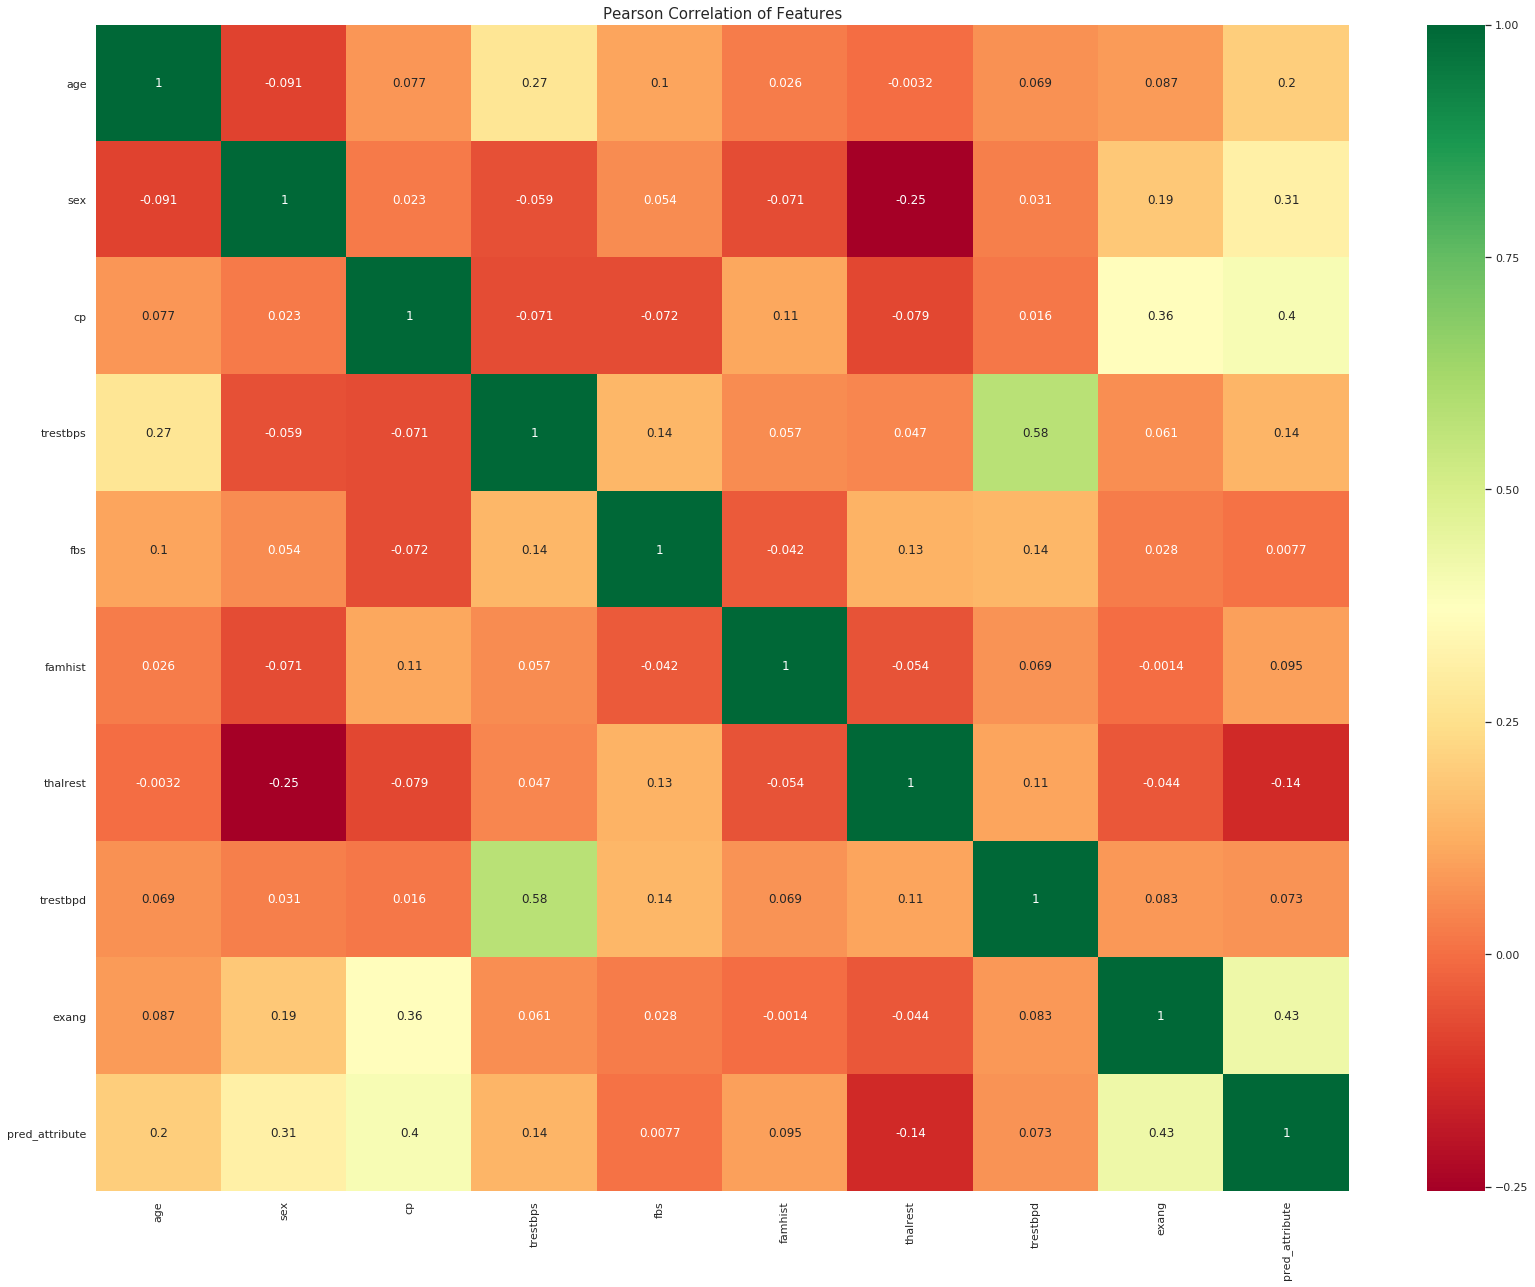

In [42]:
sns.heatmap(data[data.columns[:10]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(25,20)
#plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

In [43]:
#model = ExtraTreesClassifier(n_estimators=100,random_state=random_state)
#model.fit(X, y)
#pd.Series(model.feature_importances_, index=data1.columns).sort_values(ascending=False)

In [44]:
model = RandomForestClassifier(n_estimators=100,random_state=random_state) # , max_features=(10 ** 0.5))
model.fit(X, y)
pd.Series(model.feature_importances_, index=data1.columns).sort_values(ascending=False)

cp          0.193199
age         0.177164
thalrest    0.149441
trestbps    0.142355
trestbpd    0.117396
exang       0.104854
sex         0.071590
famhist     0.027981
fbs         0.016021
dtype: float64

In [45]:
data_select = data[['trestbps','thalrest','cp','age','exang','pred_attribute']]

X = data_select.iloc[:, :-1].values  
y = data_select.iloc[:, -1].values
#X = np_dataset[:, :-1]  
#y = np_dataset[:, -1]  

In [46]:
my_imputer = my_imputer.fit(X[:,0:5])   
X[:, 0:5] = my_imputer.transform(X[:, 0:5])

In [47]:
X = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [49]:
err_score(X_train, X_test, y_train, y_test)

Mean Absolute Error from imputation:  0.32588235294117646


In [50]:
data_copy=[]
for model in algorithms:
    model.fit(X_train,y_train)
    pred_test = model.predict(X_test)
    data_copy.append(metrics.accuracy_score(pred_test, y_test))
    
models_df2 = pd.DataFrame(data_copy, index=names)  
models_df2.columns = ['New Accuracy']  

models_df2 = models_df2.merge(models_df, left_index=True, right_index=True, how='left')
models_df2['Increase'] = models_df2['New Accuracy'] - models_df2['Accuracy']
models_df2

,New Accuracy,Accuracy,Increase
k-Nearest Neighbors,0.682353,0.764706,-0.082353
Support Vector Machine,0.729412,0.741176,-0.011765
Linear SVM,0.729412,0.741176,-0.011765
RBF SVM,0.729412,0.741176,-0.011765
Gaussian Process,0.752941,0.729412,0.023529
Decision Tree,0.670588,0.705882,-0.035294
Extra Trees,0.741176,0.764706,-0.023529
Random Forest,0.776471,0.705882,0.070588
Extra Forest,0.741176,0.729412,0.011765
AdaBoost,0.670588,0.729412,-0.058824


In [51]:
kfold = KFold(n_splits=10, random_state=random_state) # k=10, split the data into 10 equal parts
CV_results = []
# iterate over classifiers
Acc= {}
Acc_Train = {}
Acc_Test = {}
Std_Train={}
Std_Test={}
Predictions = {}
ROC = {}
AUC = {}
Gmean = {}
Precision = {}
Recall = {}
F1_score = {}
Confusion_Matrix = {}
mats = pd.DataFrame(Confusion_Matrix)

for clf in classifiers:
    #Acc[clf] = cross_validate(classifiers[clf],X=X,y=y,cv=10,n_jobs=-1,scoring='accuracy',return_train_score=True)
    Acc[clf] = cross_validate(classifiers[clf],X_train,y_train,cv=kfold,n_jobs=-1,scoring='accuracy',return_train_score=True)
    Acc_Train[clf] =  Acc[clf]['train_score'].mean()
    Acc_Test[clf] = Acc[clf]['test_score'].mean()
    Std_Train[clf] = Acc[clf]['train_score'].std()
    Std_Test[clf] = Acc[clf]['test_score'].std()
    CV_results.append(Acc[clf])
    
    classifiers[clf].fit(scaler.transform(X_train),y_train)
    pred =  classifiers[clf].predict(scaler.transform(X_test))
    ROC[clf] = roc_auc_score(y_test,pred)
    AUC[clf] = auc(y_test,pred,reorder=True)
    Gmean[clf] = fowlkes_mallows_score(y_test,pred)
    Precision[clf] = precision_score(y_test,pred)
    Recall[clf] = recall_score(y_test,pred)    
    F1_score[clf] = f1_score(y_test,pred)
    Confusion_Matrix[clf] = confusion_matrix(y_test,pred)

Accuracy_train = pd.DataFrame([Acc_Train[vals]*100 for vals in Acc_Train],columns=['Accuracy Train'],index=[vals for vals in Acc_Train])
Std_train = pd.DataFrame([Std_Train[vals]*100 for vals in Std_Train],columns=['S. Deviation Train'],index=[vals for vals in Std_Train])
Accuracy_pred = pd.DataFrame([Acc_Test[vals]*100 for vals in Acc_Test],columns=['Accuracy Test'],index=[vals for vals in Acc_Test])
Std_test = pd.DataFrame([Std_Test[vals]*100 for vals in Std_Test],columns=['S. Deviation Test'], index=[vals for vals in Std_Test])
ROC_Area = pd.DataFrame([ROC[vals] for vals in ROC],columns=['ROC(area)'],index=[vals for vals in ROC])
AUC_Area = pd.DataFrame([AUC[vals] for vals in AUC],columns=['AUC(area)'],index=[vals for vals in AUC])
Gm = pd.DataFrame([Gmean[vals] for vals in Gmean],columns=['Gmean'],index=[vals for vals in Gmean])
Prec = pd.DataFrame([Precision[vals] for vals in Precision],columns=['Precision'],index=[vals for vals in Precision])
Rec = pd.DataFrame([Recall[vals] for vals in Recall],columns=['Recall'],index=[vals for vals in Recall])
F1 =  pd.DataFrame([F1_score[vals] for vals in F1_score],columns=['F1_score'],index=[vals for vals in F1_score])

table = pd.concat([Accuracy_train,Std_train,Accuracy_pred,Std_test,ROC_Area,AUC_Area,Gm,Prec,Rec,F1], axis=1)
table.loc['MEAN VALUE'] = table.mean()
table

,Accuracy Train,S. Deviation Train,Accuracy Test,S. Deviation Test,ROC(area),AUC(area),Gmean,Precision,Recall,F1_score
k-Nearest Neighbors,84.659113,1.085851,66.894737,6.659299,0.663549,0.500000,0.545136,0.581395,0.694444,0.632911
Support Vector Machine,81.217546,0.531813,75.578947,5.737566,0.715420,0.500000,0.580566,0.622222,0.777778,0.691358
Linear SVM,77.608075,0.954939,77.052632,5.667128,0.761054,0.500000,0.693761,0.875000,0.583333,0.700000
RBF SVM,81.217546,0.531813,75.578947,5.737566,0.715420,0.500000,0.580566,0.622222,0.777778,0.691358
Gaussian Process,84.036374,1.233401,74.500000,5.694739,0.715420,0.500000,0.580566,0.622222,0.777778,0.691358
Decision Tree,100.000000,0.000000,68.368421,7.863799,0.666383,0.500000,0.555442,0.605263,0.638889,0.621622
Extra Trees,100.000000,0.000000,68.947368,10.330414,0.738662,0.500000,0.613939,0.684211,0.722222,0.702703
Random Forest,98.081000,0.986232,73.500000,8.286800,0.762755,0.500000,0.637895,0.710526,0.750000,0.729730
Extra Forest,97.800102,0.588022,70.473684,9.030420,0.746032,0.500000,0.611807,0.666667,0.777778,0.717949
AdaBoost,100.000000,0.000000,69.421053,6.690424,0.673753,0.500000,0.552979,0.595238,0.694444,0.641026


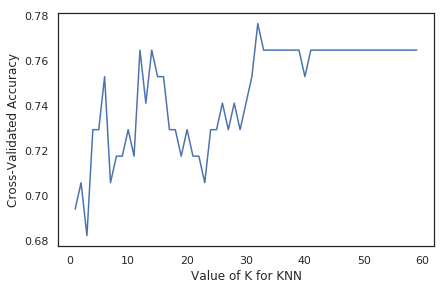

Accuracies for different values of n are:
 [0.69411765 0.70588235 0.68235294 0.72941176 0.72941176 0.75294118
 0.70588235 0.71764706 0.71764706 0.72941176 0.71764706 0.76470588
 0.74117647 0.76470588 0.75294118 0.75294118 0.72941176 0.72941176
 0.71764706 0.72941176 0.71764706 0.71764706 0.70588235 0.72941176
 0.72941176 0.74117647 0.72941176 0.74117647 0.72941176 0.74117647
 0.75294118 0.77647059 0.76470588 0.76470588 0.76470588 0.76470588
 0.76470588 0.76470588 0.76470588 0.75294118 0.76470588 0.76470588
 0.76470588 0.76470588 0.76470588 0.76470588 0.76470588 0.76470588
 0.76470588 0.76470588 0.76470588 0.76470588 0.76470588 0.76470588
 0.76470588 0.76470588 0.76470588 0.76470588 0.76470588]


In [52]:
k_range=list(range(1,60))
data_copy=pd.Series()
k_scores = []
#x=[0,1,2,3,4]
for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i) 
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    k_scores.append(scores.mean())
    model.fit(X_train,y_train)
    pred_test=model.predict(X_test)
    data_copy=data_copy.append(pd.Series(metrics.accuracy_score(pred_test,y_test)))

#plt.plot(k_range, k_scores)
plt.plot(k_range, data_copy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')    
#plt.xticks(X)
plt.show()
print('Accuracies for different values of n are:\n', data_copy.values)

In [53]:
'''svc = SVC(probability=True, random_state=random_state)
# Set the parameters by cross-validation
svc_pg = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]},
          {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    svc.fit(X_train, y_train)
    y_eval = svc.predict(X_test)
    acc = sum(y_eval == y_test) / float(len(y_test))
    print("Accuracy of SVC: %.2f%%" % (100*acc))
    
    print("Tuning hyper-parameters for %s\n" % score)
    svc_gscv = GridSearchCV(svc, svc_pg, cv=kfold, scoring='%s_macro' % score)
    svc_gscv.fit(X_train, y_train)
    print("Best parameters set found on training set:")
    print(svc_gscv.best_params_,"\n")
    print("Grid scores on training set:")
    means = svc_gscv.cv_results_['mean_test_score']
    stds = svc_gscv.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, svc_gscv.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("Detailed classification report:")
    print("The model is trained on the full training set.")
    print("The scores are computed on the full test set.")
    y_true, y_pred = y_test, svc_gscv.predict(X_test)
    print(classification_report(y_true, y_pred))
    
    svc_est = svc_gscv.best_estimator_
    svc_score = svc_gscv.best_score_
    print("Best estimator for parameter C: %f\n" % (svc_est.C))
    print("Best score: %0.2f%%\n" % (100*svc_score))

    #print(clf)'''

'svc = SVC(probability=True, random_state=random_state)\n# Set the parameters by cross-validation\nsvc_pg = [{\'kernel\': [\'rbf\'], \'gamma\': [1e-1, 1e-2, 1e-3, 1e-4],\'C\': [1, 10, 100, 1000]},\n          {\'kernel\': [\'linear\'], \'C\': [1, 10, 100, 1000]}]\n\nscores = [\'precision\', \'recall\']\n\nfor score in scores:\n    svc.fit(X_train, y_train)\n    y_eval = svc.predict(X_test)\n    acc = sum(y_eval == y_test) / float(len(y_test))\n    print("Accuracy of SVC: %.2f%%" % (100*acc))\n    \n    print("Tuning hyper-parameters for %s\n" % score)\n    svc_gscv = GridSearchCV(svc, svc_pg, cv=kfold, scoring=\'%s_macro\' % score)\n    svc_gscv.fit(X_train, y_train)\n    print("Best parameters set found on training set:")\n    print(svc_gscv.best_params_,"\n")\n    print("Grid scores on training set:")\n    means = svc_gscv.cv_results_[\'mean_test_score\']\n    stds = svc_gscv.cv_results_[\'std_test_score\']\n    \n    for mean, std, params in zip(means, stds, svc_gscv.cv_results_[\'pa

In [54]:
gnb = GaussianNB()

In [55]:
mlp = MLPClassifier(momentum=0.15,solver='sgd',learning_rate_init=1.0, early_stopping=True, shuffle=True,random_state=random_state)

mlp_pg={
'learning_rate': ["constant", "invscaling", "adaptive"],
'hidden_layer_sizes': [(10,10),(100,),(100,10)],
#'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,100),repeat=3)],
#'tol': [1e-2, 1e-3, 1e-4],
#'epsilon': [1e-3, 1e-7, 1e-8],
'alpha': [1e-2, 1e-3, 1e-4],
#'activation': ["logistic", "relu", "Tanh"]
}

mlp_gscv = GridSearchCV(mlp,param_grid=mlp_pg, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
mlp_gscv.fit(X_train, y_train)

mlp_est = mlp_gscv.best_estimator_
mlp_score = mlp_gscv.best_score_
print("Best estimator:", mlp_est, "\nBest Score:", mlp_score)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best estimator: MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='adaptive',
       learning_rate_init=1.0, max_iter=200, momentum=0.15,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=43, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False) 
Best Score: 0.7614213197969543


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   14.2s finished


In [56]:
lr = LogisticRegression(
    C=0.1,
    penalty='l2',
    dual=True,
    tol=0.0001, 
    fit_intercept=True,
    intercept_scaling=1.0, 
    class_weight=None,
    random_state=random_state)

lr_pg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr_gscv = GridSearchCV(lr,param_grid=lr_pg, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
lr_gscv.fit(X_train, y_train)

lr_est = lr_gscv.best_estimator_
lr_score = lr_gscv.best_score_
print("Best estimator:", lr_est, "\nBest Score:", lr_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Best estimator: LogisticRegression(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1.0, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=43, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
Best Score: 0.766497461928934


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


In [57]:
predictor1=LogisticRegression(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1.0, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=43, solver='warn',
          tol=0.0001, verbose=0, warm_start=False).fit(X_train, y_train)
prediction=predictor1.predict(X_test)
test_healthy = pd.Series(prediction, name="Healthy")
predictor1.score(X_test,y_test)

0.7411764705882353

In [58]:
submission = pd.DataFrame({'Healthy': prediction })
submission.to_csv("Results_df_NSR.csv", index=True)
print(submission)

    Healthy
0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
10        0
11        0
12        0
13        0
14        1
15        1
16        0
17        1
18        1
19        0
20        0
21        1
22        0
23        0
24        0
25        1
26        0
27        0
28        1
29        1
..      ...
55        0
56        1
57        0
58        1
59        1
60        0
61        1
62        1
63        1
64        0
65        0
66        0
67        0
68        0
69        0
70        1
71        0
72        0
73        1
74        1
75        0
76        0
77        1
78        1
79        0
80        0
81        1
82        1
83        1
84        1

[85 rows x 1 columns]


[0]	test-rmse:0.494993
Will train until test-rmse hasn't improved in 50 rounds.
[1]	test-rmse:0.489501
[2]	test-rmse:0.483908
[3]	test-rmse:0.481062
[4]	test-rmse:0.479305
[5]	test-rmse:0.478865
[6]	test-rmse:0.476519
[7]	test-rmse:0.47507
[8]	test-rmse:0.471113
[9]	test-rmse:0.471466
[10]	test-rmse:0.470032
[11]	test-rmse:0.469088
[12]	test-rmse:0.467693
[13]	test-rmse:0.4663
[14]	test-rmse:0.466044
[15]	test-rmse:0.466711
[16]	test-rmse:0.466183
[17]	test-rmse:0.468182
[18]	test-rmse:0.469761
[19]	test-rmse:0.468121
[20]	test-rmse:0.469833
[21]	test-rmse:0.469351
[22]	test-rmse:0.466768
[23]	test-rmse:0.46878
[24]	test-rmse:0.46909
[25]	test-rmse:0.468596
[26]	test-rmse:0.468064
[27]	test-rmse:0.470183
[28]	test-rmse:0.471864
[29]	test-rmse:0.472526
[30]	test-rmse:0.475132
[31]	test-rmse:0.474814
[32]	test-rmse:0.476101
[33]	test-rmse:0.477004
[34]	test-rmse:0.477121
[35]	test-rmse:0.478686
[36]	test-rmse:0.479797
[37]	test-rmse:0.481368
[38]	test-rmse:0.482648
[39]	test-rmse:0.48425

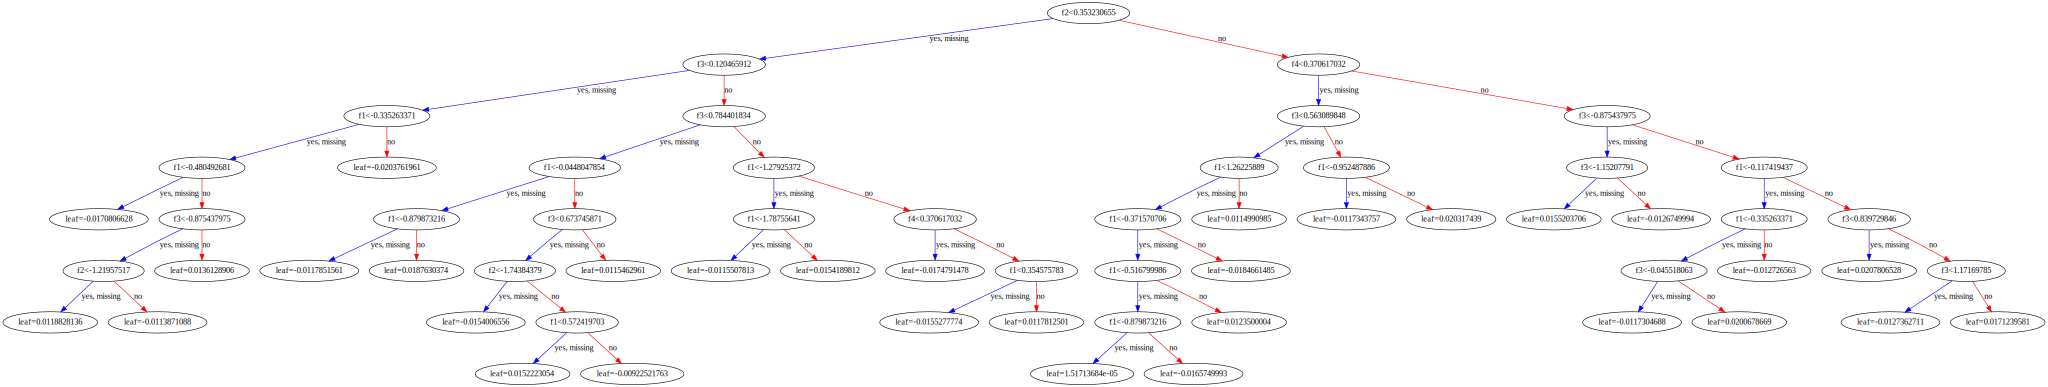

In [59]:
xgbc = xgb.XGBClassifier(
    #learning_rate = 0.02,
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread= -1,
     scale_pos_weight=1)

xgbc.fit(X_train, y_train)


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.3, random_state=random_state)
train2 = xgb.DMatrix(X_train2, y_train2)
test2 = xgb.DMatrix(X_test2, y_test2)
watchlist = [(test2, 'test')]
xgb_pg = {
    'max_depth': 3,
    'booster': 'gbtree',
    'objective': 'reg:linear',#'binary:logistic'
    'subsample': 0.8,
    'colsample_bytree': 0.85,
    'eta': 0.05,
    'max_depth': 7,
    'seed': 43,
    'silent': 0,
    'eval_metric': 'rmse' #root mean square estimate
}

bst = xgb.train(xgb_pg, train2, 500, watchlist, early_stopping_rounds=50)
#bst.save_model("model_new")
#bst = xgb.Booster(xgb_pg)
#bst.load_model("model_new")

# make prediction
#pred = bst.predict(xgb.DMatrix(X_test))
prediction = xgbc.predict(X_test)
pred = bst.predict(test2,ntree_limit=bst.best_ntree_limit)
xgb.to_graphviz(bst, num_trees=2)

In [60]:
submission = pd.DataFrame({'Healthy': prediction })
submission.to_csv("Results_df_NSR.csv", index=True)
print(submission)

    Healthy
0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        1
13        0
14        1
15        1
16        0
17        1
18        0
19        0
20        0
21        1
22        0
23        1
24        0
25        1
26        1
27        0
28        1
29        1
..      ...
55        0
56        1
57        0
58        1
59        1
60        0
61        1
62        1
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        1
71        0
72        1
73        1
74        1
75        1
76        0
77        1
78        1
79        1
80        1
81        1
82        1
83        1
84        1

[85 rows x 1 columns]


In [61]:
class Ensemble(object):
    def __init__(self, n_folds, stacker, base_models):
        self.n_folds = n_folds
        self.stacker = stacker
        self.base_models = base_models

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(len(y), n_folds=self.n_folds, shuffle=True, random_state=2016))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))

        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((T.shape[0], len(folds)))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                # y_holdout = y[test_idx]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(T)[:]

            S_test[:, i] = S_test_i.mean(1)

        self.stacker.fit(S_train, y)
        y_pred = self.stacker.predict(S_test)[:]
        return y_pred

In [62]:
gnb_mlp=VotingClassifier(estimators=[('Guassian Naive Bayes', gnb),('Multilayer Perceptron',mlp)], voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The accuracy for Guassian Naive Bayes and Multilayer Perceptron:',gnb_mlp.score(X_test,y_test))

The accuracy for Guassian Naive Bayes and Multilayer Perceptron: 0.7294117647058823


In [63]:
gnb_lr=VotingClassifier(estimators=[('Guassian Naive Bayes', gnb),('Logistic Regression', lr)], voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The accuracy for Guassian Naive Bayes and Logistic Regression:',gnb_lr.score(X_test,y_test))

The accuracy for Guassian Naive Bayes and Logistic Regression: 0.7294117647058823


In [64]:
mlp_lr=VotingClassifier(estimators=[('Multilayer Perceptron',mlp), ('Logistic Regression', lr)], voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The accuracy for Multilayer Perceptron and Logistic Regression:',mlp_lr.score(X_test,y_test))

The accuracy for Multilayer Perceptron and Logistic Regression: 0.7176470588235294


In [65]:
gnb_mlp_lr=VotingClassifier(estimators=[('Guassian Naive Bayes', gnb),('Multilayer Perceptron',mlp), ('Logistic Regression', lr)], voting='soft', weights=[3,2,1]).fit(X_train,y_train)
print('The ensembled model with Guassian Naive Bayes, Multilayer Perceptron, and Logistic Regression:',gnb_mlp_lr.score(X_test,y_test))

The ensembled model with Guassian Naive Bayes, Multilayer Perceptron, and Logistic Regression: 0.7411764705882353


NameError: name 'svc_est' is not defined

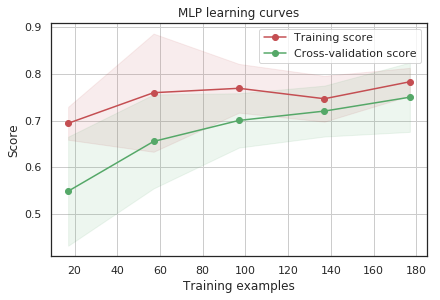

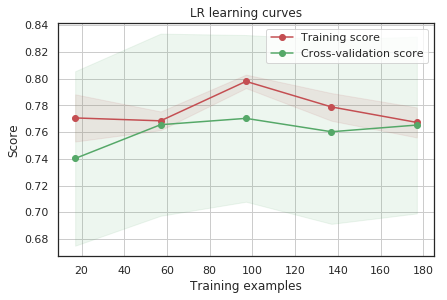

In [66]:
# Generate a simple plot of the test and training learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

#gnb_plot = plot_learning_curve(gnb_est,"GNB learning curves",X_train,Y_train,cv=kfold)
mlp_plot = plot_learning_curve(mlp_est,"MLP learning curves",X_train,y_train,cv=kfold)
lr_plot = plot_learning_curve(lr_est,"LR learning curves",X_train,y_train,cv=kfold)
svc_plot = plot_learning_curve(svc_est,"SVC learning curves",X_train,y_train,cv=kfold)
#xgb_plot = plot_learning_curve(xgb_gscv.best_estimator_,"XBG learning curves",X_train,Y_train,cv=kfold)


In [67]:
#test_survived_gnb = pd.Series(gnb_est.predict(test), name="GNBC")
test_Survived_mlp = pd.Series(mlp_est.predict(X_test), name="MLP")
test_Survived_lr = pd.Series(lr_est.predict(X_test), name="LR")
test_Survived_svc = pd.Series(svc_est.predict(X_test), name="SVC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_mlp,test_Survived_lr,test_Survived_svc],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

NameError: name 'svc_est' is not defined

In [68]:
finalVC = VotingClassifier(estimators=[('Logistic Regression', lr),('SVM',svc)], voting='soft', weights=[2,1], n_jobs = -1).fit(X_train,y_train)
print('The ensembled model with all classfiers: ',finalVC.score(X_test,y_test))

# Generate Submission File 
test_healthy = pd.Series(finalVC.predict(X_test), name="Healthy")
#results = pd.concat([X_test['index'],test_healthy],axis=1)
#results.to_csv("Results_series_NSR.csv", index=False)
#submission1 = pd.DataFrame({'Healthy Probabilty': pred })
#submission1.to_csv("Results_df1_NSR.csv", index=True)
#print(submission1)


NameError: name 'svc' is not defined

In [69]:
submission = pd.DataFrame({'Healthy': prediction })
submission.to_csv("Results_df_NSR.csv", index=True)
print(submission)

    Healthy
0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        1
13        0
14        1
15        1
16        0
17        1
18        0
19        0
20        0
21        1
22        0
23        1
24        0
25        1
26        1
27        0
28        1
29        1
..      ...
55        0
56        1
57        0
58        1
59        1
60        0
61        1
62        1
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        1
71        0
72        1
73        1
74        1
75        1
76        0
77        1
78        1
79        1
80        1
81        1
82        1
83        1
84        1

[85 rows x 1 columns]
